# Examen parcial 3 (Algebra linear y equaciones diferenciales)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 11 am del 22.10.2021 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 
* comentar sobre github..
* pistas generales

In [7]:
from scipy.integrate import solve_bvp
from scipy.integrate import solve_ivp
import scipy
import matplotlib.pyplot as plt
import numpy as np

## Ejercicio 1. Algebra linear.
#### Introducion:

En varios casos, sistema de equaciones diferentiales lineares
tipo 
$$\frac{d\textbf{x}}{dt}=\textbf{A}\textbf{x}$$
con solucion:
$$ \textbf{x}(t) = e^{t\textbf{A}} \textbf{C}$$

(donde $\textbf{x}$ es un vector, $\textbf{A}$ es matrix y $\textbf{C}$ es vector de condiciones iniciales)

se simplifica a calcular exponente de matriz: $e^{\textbf{A}t}$!!!!

$\textbf{Ejercicio:}$ calcular $e^{A}$ definido como:

$$e^A=Pe^DP^{-1}$$

donde $e^D$ es

$$e^D=
\begin{bmatrix}
e^{\lambda_1} & 0 & \cdots & 0 \\
0 & e^{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & e^{\lambda_n} \\
\end{bmatrix}
$$

$P$ son eigenvectors y $P^{-1}$ es inversion de $P$

* a) Construye una function $\textbf{matrix_exp(A)}$ que acepta una matrix A como un argumento
* b) si matrix no es cuadrada: imprime "Matrix must be square" y sale la funcion usando: $\textbf{return}$
* c) si matrix es cuadrada ($\textbf{else:}$): calcule y imprime valor de $e^A$
* pista 1: D=np.diag(eigenvalues) (asi es mas facil que construir D in loop)
* para verificar su resultado uno puede usar scipy.linalg.expm(A)

In [8]:
A=np.array([[5,1],
           [-2,2]])
def matrix_exp(A):
    s=A.shape
    if s[0]==s[1]:
        d, P = np.linalg.eig(A) #Se halla la diagonal d
        D=np.zeros(s)
        for i in range(s[0]):
            D[i,i] = np.exp(d[i])  #la diagonal se hace e^d[i,i]
        P_1=np.linalg.inv(P)
        eDa=np.matmul(P, D) 
        eD=np.matmul(eDa, P_1)
        print('e^A:\n',eD)
    else:
        print('Matrix must be square')
        return

In [14]:
print('e^A con scipy: \n',scipy.linalg.expm(A))
matrix_exp(A)

e^A con scipy: 
 [[ 89.11076314  34.51261311]
 [-69.02522622 -14.42707619]]
e^A:
 [[ 89.11076314  34.51261311]
 [-69.02522622 -14.42707619]]


## Ejercicio 2. Equaciones diferenciales - Boundary value problem.

Transporte de calor en un objeto puede ser escrito usando segunda orden equacion diferencial (scipy.integrate.solve_bvp):
$$\frac{d^2T}{dx^2}=0.01T-0.2$$
donde T es temperatura y x es largura de objeto

a) Resolver este equacion diferencial cumpliendo siguientes condiciones de limite:

T(x=0)=40 & T(x=10)=200

b) Hace grafico de T(x) vs x (con legend) 

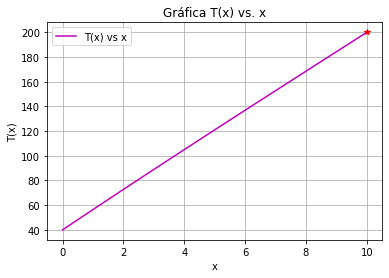

In [16]:
def derivs(x,t):       #Funciones derivadas
    dtdx=np.zeros((t.shape))
    dtdx[0]=t[1]
    dtdx[1]=0.001*t[0] - 0.2
    return dtdx
 
def bc(ta,tb):              #Boundary conditions
    residuals=np.array([0.0,0.0])
    residuals[0]=ta[0] - 40
    residuals[1]=tb[0] - 200
    return residuals

x_steps = 100
x = np.linspace(0, 10, x_steps)

y0 = np.ones((2,x_steps))

sol = solve_bvp(derivs, bc, x, y0)

#Gráfica
fig, ax = plt.subplots(1,1)
ax.plot(sol.x, sol.y[0],'-m', label='T(x) vs x')
ax.plot(10, 200,'*r')
ax.set_title('Gráfica T(x) vs. x')
ax.set_xlabel('x')
ax.set_ylabel('T(x)')
ax.legend()
ax.grid()

## Ejercicio 3. Equaciones diferenciales - Initial value problem.

a) resolver equacion diferencial (scipy.integrate.solve_ivp):

$$\dot{y}=-2*t*y$$
y(0)=1\
t=[0:5] con 100 puntos

b) Hace grafico de y(t) vs t (con legend) 

c) crear una funcion $\textbf{sol_ode_params(y0,t0,tf,npoints)}$ que acepta cuatro parametros ($y_{initial}, t_{initial}, t_{final},n_{points}$) en este orden, resuelve mismo equacion y automaticamente hace grafico de y(t) vs t para estos parametros.

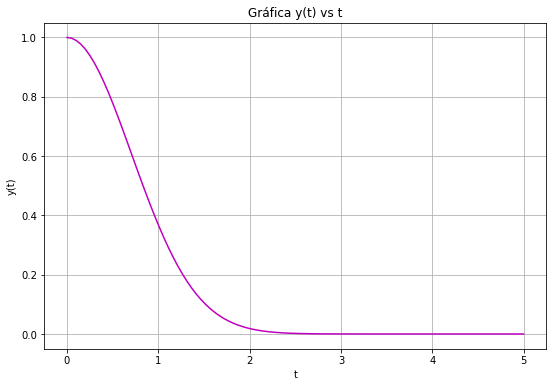

In [17]:
tini=0.0
tfin=5.0
y0=1.0
N=100

t_span=[tini, tfin]
p=np.linspace(tini, tfin, N)

def fun(t, y):
    return -2*t*y
    
sol_ivp = solve_ivp(fun, t_span, [y0], t_eval=p)

fig, a = plt.subplots(1,1, figsize=(9,6))
a.plot(p, sol_ivp.y[0],'m')
a.set_xlabel('t')
a.set_ylabel('y(t)')
a.set_title('Gráfica y(t) vs t')
a.grid()


#Función con los parametros
def sol_ode_params(y0, t0, tf, npoints):
    t_span=[t0, tf]
    points = np.linspace(t0, tf, npoints)
    def f(t,y):
        return -2*t*y
    sol_ivp = solve_ivp(f, t_span, [y0], t_eval=points)
    plt.plot(points, sol_ivp.y[0], 'gold')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title('y(t) vs t')
    plt.grid()
    

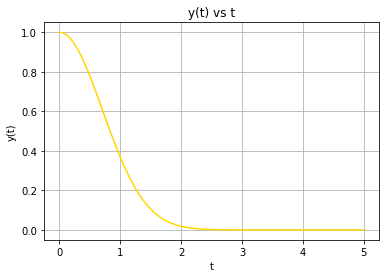

In [12]:
sol_ode_params(y0,tini, tfin, N) 